In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

# part a
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
df.head()

Age  RestBP  Chol  RestECG  MaxHR  Oldpeak  AHD
0   63     145   233        2    150      2.3   No
1   67     160   286        2    108      1.5  Yes
2   67     120   229        2    129      2.6  Yes
3   37     130   250        0    187      3.5   No
4   41     130   204        2    172      1.4   No

In [38]:
# part b
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']
X = df[feature_cols] 
y = df['AHD']

In [39]:
X = preprocessing.scale(X)
print(X)

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ...
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]


In [40]:
# part c

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [41]:
# part d

# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']


C:\Users\ss115\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)

0.7183098591549296


In [54]:
# part 2
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label="Yes")

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [60]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


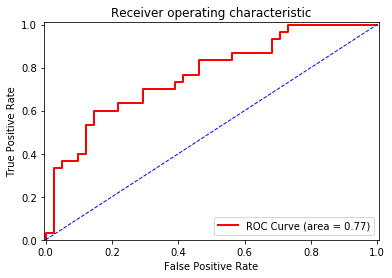

In [61]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()